In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('SentAnalysis_Eng_to_Spa.csv')

In [3]:
df.head(1)

,English,Spanish,eng_sadness,eng_joy,eng_love,eng_anger,eng_fear,eng_surprise,spa_sadness,spa_joy,spa_love,spa_anger,spa_fear,spa_surprise
0,It’s 2009 Alyssa Elliot is sitting at her desk...,"Es 2009, Alyssa Elliot está sentada en su escr...",0.028962,0.015933,0.001228,0.918944,0.034355,0.000578,0.034715,0.587366,0.006106,0.29488,0.073891,0.003041


## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [4]:
ordered_columns = ['eng_sadness', 'spa_sadness', 
                   'eng_joy', 'spa_joy', 
                   'eng_love', 'spa_love', 
                   'eng_anger', 'spa_anger', 
                   'eng_fear', 'spa_fear', 
                   'eng_surprise', 'spa_surprise']

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df.head()

,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise
0,0.028962,0.034715,0.015933,0.587366,0.001228,0.006106,0.918944,0.294880,0.034355,0.073891,0.000578,0.003041
1,0.048499,0.033154,0.655383,0.466453,0.002718,0.013687,0.134418,0.459348,0.155827,0.023905,0.003155,0.003452
2,0.002284,0.031101,0.995309,0.752294,0.000517,0.005180,0.001167,0.181601,0.000398,0.027118,0.000326,0.002706
3,0.126080,0.040082,0.331886,0.553136,0.009107,0.069975,0.416006,0.304728,0.112349,0.029099,0.004571,0.002979
4,0.016062,0.027138,0.569976,0.385050,0.005678,0.013899,0.379225,0.530640,0.027054,0.038923,0.002005,0.004351


In [5]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']].idxmax(axis=1)

In [6]:
# Remove the prefix "eng_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('eng_', '')

# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' column
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('spa_', '')

# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()

top_emotion_accuracy = matching_count/df.shape[0]*100
print(np.round(top_emotion_accuracy),"% of the English to Spanish translations by DeepTranslator have the same top-ranked emotion.")

50.0 % of the English to Spanish translations by DeepTranslator have the same top-ranked emotion.


In [7]:
# I don't think I ended up using this, 
# I was just playing around to see if we had ok sentiment matches in general, since there were ZERO matches on top sentiment

df['eng_positive'] = df['eng_joy'] + df['eng_love']
df['spa_positive'] = df['spa_joy'] + df['spa_love']

df['eng_negative'] = df['eng_sadness'] + df['eng_anger'] + df['eng_fear']
df['spa_negative'] = df['spa_sadness'] + df['spa_anger'] + df['spa_fear']

df['eng_neutral'] = df['eng_surprise']
df['spa_neutral'] = df['spa_surprise']

In [8]:
# Summary statistics for rows
row_summary = df.describe()

# Summary statistics for columns
col_summary = df[2:].describe()

# Overall summary statistics
overall_summary = df.describe().describe()

# Output the summary statistics
#print("Summary statistics for rows:")
#print(row_summary)
#print("\nSummary statistics for columns:")
#print(col_summary)
print("Column summary statistics\nfor Spa->Eng with DeepTranslator")
col_summary

Column summary statistics
for Spa->Eng with DeepTranslator


,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise,eng_positive,spa_positive,eng_negative,spa_negative,eng_neutral,spa_neutral
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,0.102616,0.027273,0.487159,0.582121,0.032048,0.010148,0.241850,0.321238,0.108094,0.055187,0.028233,0.004031,0.519207,0.592270,0.452560,0.403699,0.028233,0.004031
std,0.253096,0.023991,0.421913,0.245351,0.142824,0.006644,0.326006,0.212367,0.237653,0.073648,0.138366,0.002083,0.424780,0.245392,0.421701,0.244473,0.138366,0.002083
min,0.000142,0.000718,0.000193,0.004429,0.000110,0.000859,0.000108,0.000955,0.000083,0.000483,0.000108,0.000221,0.000359,0.005288,0.000373,0.002157,0.000108,0.000221
25%,0.001962,0.017705,0.022227,0.405961,0.000738,0.006398,0.002540,0.156773,0.001122,0.024211,0.000517,0.002815,0.031021,0.416059,0.013284,0.213602,0.000517,0.002815
50%,0.009417,0.024631,0.483996,0.631011,0.001858,0.009048,0.041034,0.270155,0.009035,0.039651,0.001323,0.003696,0.570227,0.641927,0.340126,0.353852,0.001323,0.003696
75%,0.035284,0.032229,0.965533,0.773137,0.004358,0.012231,0.432767,0.461189,0.060501,0.060320,0.003563,0.004745,0.981136,0.782879,0.950997,0.576980,0.003563,0.004745
max,0.998985,0.449641,0.998986,0.996401,0.995158,0.090842,0.997942,0.970976,0.997606,0.950436,0.990437,0.018626,0.999383,0.997622,0.999454,0.994197,0.990437,0.018626


In [9]:
# Extract English and Spanish sentiment columns
eng_sentiments = np.array(df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']])
spa_sentiments = np.array(df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']])

eng_sentiments_simpl = np.array(df[['eng_positive', 'eng_negative', 'eng_neutral']])
spa_sentiments_simpl = np.array(df[['spa_positive', 'spa_negative', 'spa_neutral']])


# Calculate stats for the difference between English and Spanish sentiments for each sentiment category
difference = eng_sentiments - spa_sentiments
abs_difference = abs(eng_sentiments - spa_sentiments)

abs_difference[np.isnan(abs_difference)] = 0

mean_abs_difference = np.mean(abs_difference, axis=0)

std_difference = np.std(abs_difference, axis=0)

min_difference = np.min(abs_difference, axis=0)

max_difference = np.max(abs_difference, axis=0)


concatenated_arrays = pd.concat([pd.Series(mean_abs_difference), pd.Series(std_difference), pd.Series(min_difference), pd.Series(max_difference)], axis=1)
concatenated_arrays.columns = ['Mean Absolute Difference', 'Standard Deviation', 'Minimum Absolute Difference', 'Maximum Absolute Difference']
concatenated_arrays.index = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print('Statistics for absolute differences between English and Spanish Sentiments')
concatenated_arrays

Statistics for absolute differences between English and Spanish Sentiments


,Mean Absolute Difference,Standard Deviation,Minimum Absolute Difference,Maximum Absolute Difference
Sadness,0.101425,0.239387,0.0,0.991329
Joy,0.379767,0.248711,0.0,0.982791
Love,0.035780,0.139531,0.0,0.986873
Anger,0.281196,0.211342,0.0,0.924713
Fear,0.115572,0.216431,0.0,0.989109
Surprise,0.028316,0.137093,0.0,0.985843


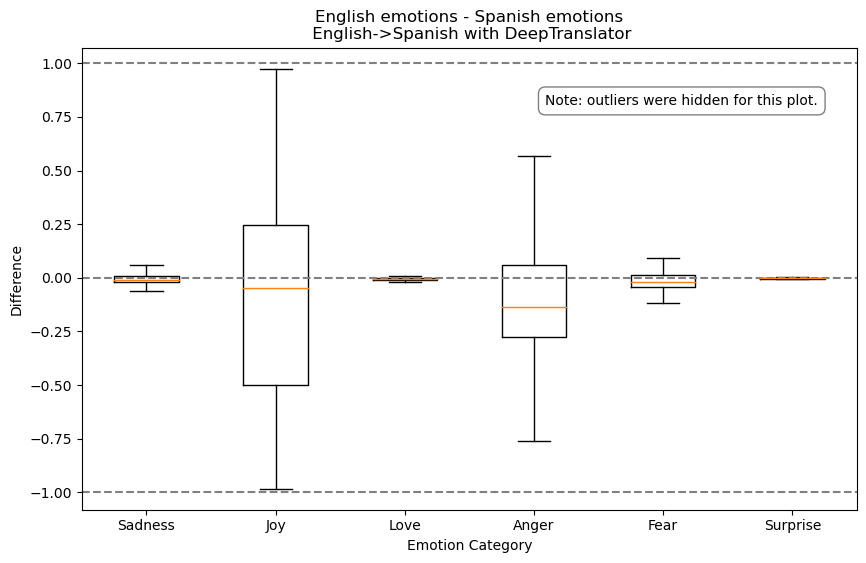

In [17]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(difference, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], showfliers=False)
plt.title('English emotions - Spanish emotions\n English->Spanish with DeepTranslator')
plt.xlabel('Emotion Category')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))


plt.show()

## Why do Joy and Anger have so much spread?

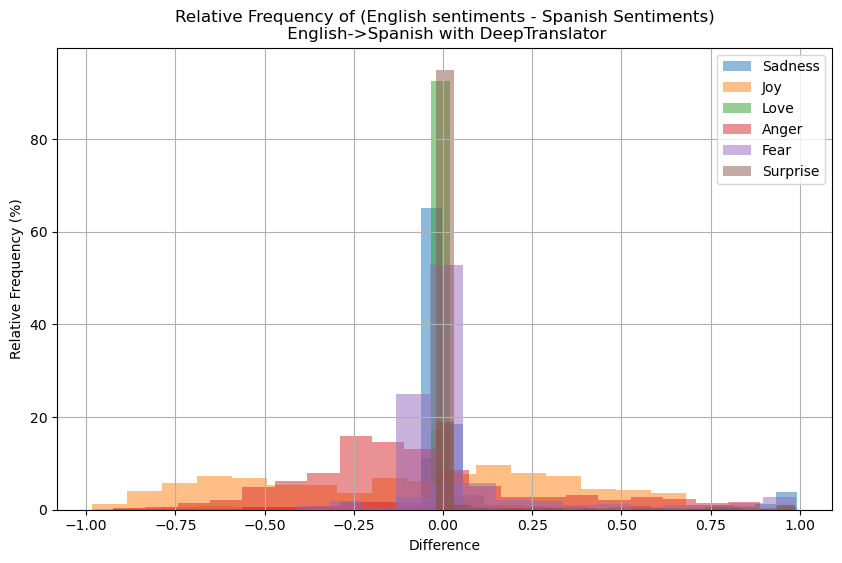

In [16]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each sentiment category
legend_handles = []  # To store legend handles
for i, sentiment in enumerate(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']):
    counts, bins, _ = ax.hist(difference[:, i], bins=20, alpha=0.5, density=True, label=sentiment)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percent = counts / counts.sum() * 100
    bars = ax.bar(bin_centers, percent, width=(bins[1] - bins[0]), alpha=0.5)
    legend_handles.append(bars[0])  # Store only the first bar for each sentiment category

# Add labels and title
ax.set_title('Relative Frequency of (English sentiments - Spanish Sentiments)\n English->Spanish with DeepTranslator')
ax.set_xlabel('Difference')
ax.set_ylabel('Relative Frequency (%)')

# Add legend with single entry for each sentiment category
ax.legend(legend_handles, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.grid(True)
plt.show()

# Trying to do more stats with I'm not stoked on the results
Probably just want to drop these cells, but I wasn't sure yet.

In [ ]:
abs_diff_df = pd.DataFrame(abs_difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})
abs_diff_df

In [ ]:
from scipy.stats import ttest_1samp

sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# Perform one-sample t-test for each category
alpha = 0.05  # significance level

for sentiment in sentiments:
    stat, p_value = ttest_1samp(abs_diff_df[sentiment], 0)
    print(f"Sentiment: {sentiment}")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.")
    else:
        print("Fail to reject the null hypothesis: There is no evidence that the true absolute difference is not equal to 0.")
    print()